# <center>Tugas Besar Individu Pembelajaran Mesin Lanjut</center>

<b>Topik</b>
Implementation of Swarm Intelligence

<b>Dikerjakan oleh</b>
Muhammad Ridho Sunation - 1301213038

<b>Url presentasi</b>
http:https://youtu.be/_7Ijcyb3-Qk

Fungsi yang dikerjakan

Tulis fungsi di sini
- Formula : F5 = $ F_5(x) = \sum_{i=1}^{n-1} \left( 100(-x_i^2 + x_{i+1})^2 + (x_i - 1)^2 \right) $


Range yang digunakan
- Misal: [-50, 50]

Algoritma yang digunakan
- RAO3

**Kode** <br> Import Library yang kamu butuhkan :)

In [4]:
# Import Library
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

**Fungsi F5** <br> Penjelasan : Fungsi ini merupakan fungsi objektif yang akan dioptimalkan. Ini adalah bentuk modifikasi dari fungsi Rosenbrock yang sering digunakan untuk pengujian algoritma optimasi.

In [5]:
def F5(x):
    n = len(x)
    result = 0
    for i in range(n-1):
        term1 = 100 * (-x[i]**2 + x[i+1])**2
        term2 = (x[i] - 1)**2
        result += term1 + term2
    return result

**Parameter & Inisiasi** <br>


In [6]:
# Parameter
n_candidates = 80  # Ukuran populasi
max_iterations = 100  # Jumlah iterasi maksimum
x_range = (-50, 50)  # Rentang untuk populasi awal

# Inisialisasi populasi awal secara acak
np.random.seed(42)
population = np.random.uniform(x_range[0], x_range[1], (n_candidates, 2))

# Fungsi untuk menghitung fitness dari populasi
def calculate_fitness(population):
    return np.array([F5(individual) for individual in population])

# Inisialisasi fitness populasi awal
fitness = calculate_fitness(population)



**Fungsi Utama RAO3**

In [7]:
# RAO3 Algorithm
def rao_v3(population, fitness):
    history = []  # List untuk menyimpan populasi pada setiap iterasi
    for _ in range(max_iterations):
        new_population = np.copy(population)  # Salin populasi saat ini untuk penggunaan dalam iterasi ini
        for i in range(n_candidates):
            r1 = np.random.random()
            r2 = np.random.random()
            best = population[np.argmin(fitness)]
            worst = population[np.argmax(fitness)]
            random_individual = population[np.random.randint(0, n_candidates)]

            # Update aturan dimodifikasi sesuai dengan formula
            new_population[i] = population[i] + \
                                r1 * (best - np.abs(worst)) + \
                                r2 * (np.logical_or(population[i], random_individual) - population[i])

            # Memastikan batas tetap terjaga
            new_population[i] = np.clip(new_population[i], x_range[0], x_range[1])

        # Evaluasi populasi baru
        new_fitness = calculate_fitness(new_population)

        # Ganti populasi lama dengan yang baru jika lebih baik
        for j in range(n_candidates):
            if new_fitness[j] < fitness[j]:
                population[j] = new_population[j]
                fitness[j] = new_fitness[j]

        history.append(population.copy())

    return population, history

final_population, history = rao_v3(population, fitness)

Membuat Hasil GIF

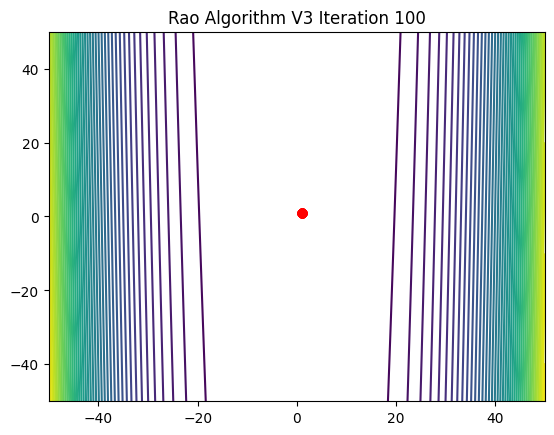

In [8]:
# Buat GIF

# Persiapkan data plot kontur
bounds = (-50, 50)
X1 = np.linspace(bounds[0], bounds[1], 400)
X2 = np.linspace(bounds[0], bounds[1], 400)
X1, X2 = np.meshgrid(X1, X2)
Z = np.array([F5([x1, x2]) for x1, x2 in zip(X1.ravel(), X2.ravel())]).reshape(X1.shape)

# Atur gambar dan sumbu untuk animasi
fig, ax = plt.subplots()
ax.set_xlim(bounds[0], bounds[1])
ax.set_ylim(bounds[0], bounds[1])
contour = ax.contour(X1, X2, Z, levels=50)
scatter = ax.scatter([], [], c='red')  # Kandidat solusi

# Fungsi pembaruan untuk animasi
def update(frame):
    positions = history[frame]
    scatter.set_offsets(positions)
    ax.set_title(f'Rao Algorithm V3 Iteration {frame + 1}')
    return scatter,

ani = FuncAnimation(fig, update, frames=len(history), blit=True, repeat=False)

writer = PillowWriter(fps=5)  # Adjust fps for speed preference
ani.save("rao_algorithm_v3.gif", writer=writer)
plt.show()


# Buat hasil GIF (3D Animation)

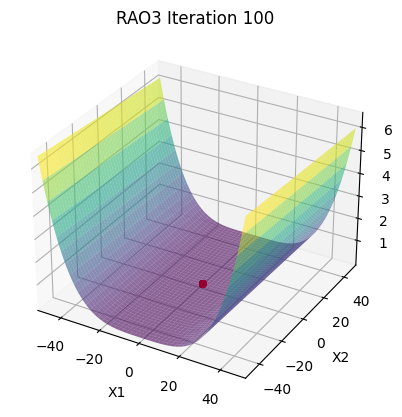

In [9]:


# Buat hasil GIF (3D Animation)

from mpl_toolkits.mplot3d import Axes3D

# Atur gambar dan sumbu untuk animasi
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(bounds[0], bounds[1])
ax.set_ylim(bounds[0], bounds[1])
ax.set_zlim(np.min(Z), np.max(Z))
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('F5')
contour = ax.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.6)
scatter = ax.scatter([], [], [], c='red')  # Titik-titik yang merepresentasikan posisi kandidat solusi

# Fungsi pembaruan untuk animasi
def update(frame):
    ax.set_title(f'RAO3 Iteration {frame + 1}') # Update judul plot dengan nomor iterasi
    positions = history[frame] # Ambil posisi kandidat dari histori pada iterasi tertentu
    fitness = np.array([F5(ant) for ant in positions]) # Evaluasi fitness dari setiap posisi kandidat
    scatter._offsets3d = (positions[:, 0], positions[:, 1], fitness) # Atur posisi kandidat
    return scatter,

# Buat animasi
ani = FuncAnimation(fig, update, frames=len(history), blit=True, repeat=False)

# Simpan animasi sebagai GIF
writer = PillowWriter(fps=5)
ani.save("rao_algorithm_v3_3D.gif", writer=writer)
plt.show()


# Analisis

Berdasarkan kegiatan yang kita lakukan di dapat hasil kesimpulan <br> Algoritma Ant Colony Optimization (ACO)

**Kelebihan**<br>**1. Kesederhanaan**: RAO3 relatif sederhana dalam implementasi dan tidak memerlukan banyak parameter seperti ACO.<br>**2. Efisiensi**: Efisien dalam waktu komputasi karena tidak menggunakan mekanisme pheromone yang kompleks.<br>**3. Adaptabilitas**: Mampu beradaptasi dengan mudah ke berbagai jenis masalah optimasi.

**Kekurangan**<br> **1. Eksplorasi Terbatas**: RAO3 mungkin kurang efektif dalam eksplorasi ruang pencarian yang sangat besar dibandingkan dengan ACO yang menggunakan pheromone.<br>**2. Ketergantungan pada Populasi Awal**: Hasil akhir sangat tergantung pada populasi awal yang diinisialisasi secara acak.<br>**3. Kemungkinan Stagnasi**: Terkadang algoritma dapat terjebak dalam local minima dan mengalami stagnasi jika tidak ada diversifikasi yang memadai.

**Kesimpulan** <br> **ACO** adalah pilihan yang lebih baik untuk masalah yang kompleks dan memerlukan pencarian jalur yang efektif dengan eksplorasi intensif, meskipun dengan biaya komputasi yang lebih tinggi. Sementara itu, **RAO3** adalah alternatif yang lebih sederhana dan efisien untuk masalah optimasi yang lebih sederhana atau ketika waktu komputasi menjadi prioritas utama. Pemilihan antara ACO dan RAO3 sangat bergantung pada sifat masalah yang dihadapi dan prioritas dalam hal waktu komputasi versus kualitas solusi.